Libraries:

In [1]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import *
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.quantum_info import Operator
from IPython.display import display

Functions:

In [2]:
# Function performs QFT on first n qubits in the circuit
def qft_rotations(qc, n):

    if n == 0:
        return qc
    
    n -= 1
    qc.h(n)
    
    for qubit in range(n):
        qc.cp(pi/2**(n-qubit), qubit, n)
        
    qft_rotations(qc, n)

In [3]:
# Reverse order of qubits to match definition
def swap_registers(qc, n):
    
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
        
    return qc

In [4]:
# Performs QFT on first n qubits
def qft(qc, n):
    
    qft_rotations(qc, n)
    swap_registers(qc, n)
    
    return qc

In [5]:
# Performs IQFT on first n qubits
def inverse_qft(qc, n):

    qft_circ = qft(QuantumCircuit(n), n)
    invqft_circ = qft_circ.inverse()
    qc.append(invqft_circ, qc.qubits[:n])
    
    return qc.decompose() 

In [6]:
# Encodes an integer to binary and places it into the quantum circuit
def encode_integer(num):
    
    # Calculate the number of qubits needed to represent the integer
    nqubits = num.bit_length()

    # Create a quantum circuit with the required number of qubits
    qc = QuantumCircuit(nqubits)

    # Encode the integer using Pauli-X gates
    for i, bit in enumerate(reversed(bin(num)[2:])):
        if bit == '1':
            qc.x(i)

    return qc, nqubits

Testing the Circuit:

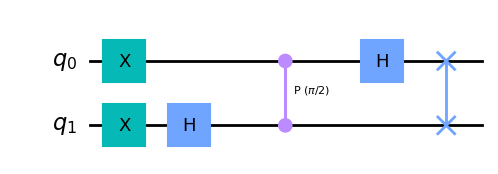

In [7]:
number = 3
qc, nqubits = encode_integer(number)
qc = qft(qc,nqubits)
qc.draw('mpl')

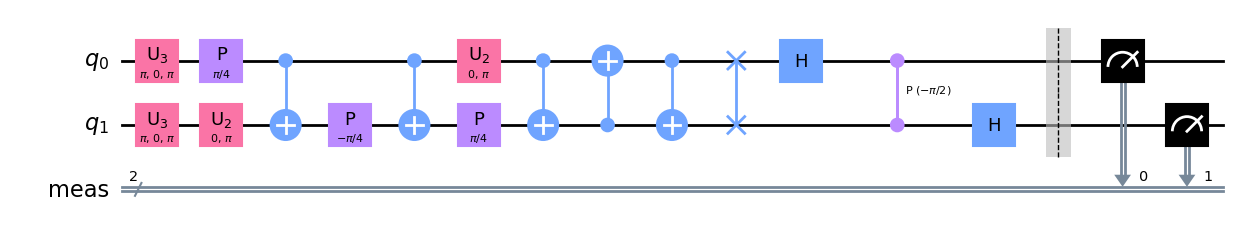

In [8]:
qc = inverse_qft(qc, nqubits)
qc.measure_all()
qc.draw('mpl')

Results:

In [9]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots=2048)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'11': 2048}


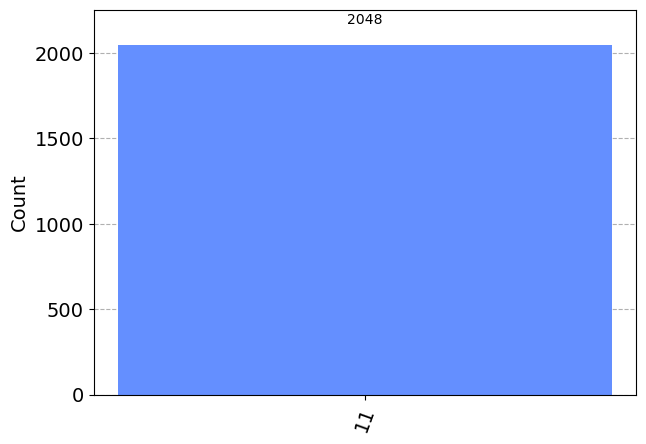

In [10]:
plot_histogram(counts)